In [29]:
import numpy as np
import pandas as pd
import seaborn as sns


In [30]:
data=pd.read_csv('Churn.csv',na_values='',index_col='customerID')

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn', ylabel='Count'>

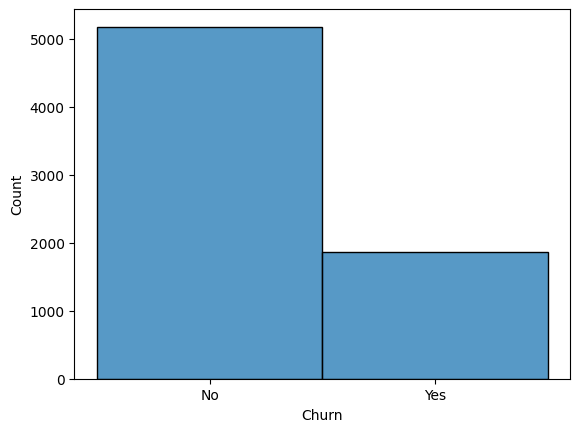

In [32]:
sns.histplot(x='Churn', data=data)

K FOLD ALOGRITHM


In the 'K-fold' algorithm, for example, the data is splitted into k folds (hence the name). Then, in each iteration round the model is trained in k-1 folds, while one fold is used for validation. This process is repeated, changing the test fold in each iteration, until all folds have been used for validation.

In [33]:
from sklearn.model_selection import KFold



kf = KFold(n_splits=5, shuffle=False, random_state=None)
idxs = kf.split(data)

In [34]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [1409 1410 1411 1412 1413]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 4]
Last 5 test indeces: [1404 1405 1406 1407 1408]

Iteration 1:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [1409 1410 1411 1412 1413]
Last 5 test indeces: [2813 2814 2815 2816 2817]

Iteration 2:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [2818 2819 2820 2821 2822]
Last 5 test indeces: [4222 4223 4224 4225 4226]

Iteration 3:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [4227 4228 4229 4230 4231]
Last 5 test indeces: [5630 5631 5632 5633 5634]

Iteration 4:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [5630 5631 5632 5633 5634]
First 5 test indeces: [5635 5636 5637 5638 5639]
Last 5 test indeces: [7038 7039 7040 7041 7042]



| Iteration | Test Indices Range | Train Indices Range (combined) |
| --------- | ------------------ | ------------------------------ |
| 0         | 0 – 1408           | 1409 – 7042                    |
| 1         | 1409 – 2817        | 0 – 1408, 2818 – 7042          |
| 2         | 2818 – 4226        | 0 – 2817, 4227 – 7042          |
| 3         | 4227 – 5634        | 0 – 4226, 5635 – 7042          |
| 4         | 5635 – 7042        | 0 – 5634                       |

Explanation
Each fold uses a different 1/5th slice of the data for testing.

The rest of the indices are used for training.

Every sample appears once in the test set and four times in the training sets across the 5 iterations.
 7043 total data points (based on your last index).

📦 Fold Sizes
Total samples = 7043

5 folds ⇒ each fold = 7043 ÷ 5 ≈ 1408.6 ≈ 1408 or 1409
The actual fold sizes will vary a bit to ensure the full dataset is used.



Repeated K-Fold

In some cases you may want to get different k-folds in each training iteration. The RepeatedKFold class makes a (possibly) different splitting in each training iteration. Hence, instead of switching between partitions, you just generate whole new partitions, so your training iterations aren't necessarily restricted to the number of folds you generate

In [35]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=None)

idxs = rkf.split(data)

In [36]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i//3}:')
    print(f'Fold {i%3}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
Fold 0:
First 5 train indeces: [0 1 3 5 6]
Last 5 train indeces: [7035 7036 7037 7039 7040]
First 5 test indeces: [ 2  4 12 13 16]
Last 5 test indeces: [7028 7033 7038 7041 7042]

Iteration 0:
Fold 1:
First 5 train indeces: [0 2 3 4 5]
Last 5 train indeces: [7036 7038 7039 7041 7042]
First 5 test indeces: [ 1  6  7 14 17]
Last 5 test indeces: [7030 7034 7035 7037 7040]

Iteration 0:
Fold 2:
First 5 train indeces: [1 2 4 6 7]
Last 5 train indeces: [7037 7038 7040 7041 7042]
First 5 test indeces: [0 3 5 8 9]
Last 5 test indeces: [7029 7031 7032 7036 7039]

Iteration 1:
Fold 0:
First 5 train indeces: [0 3 4 5 7]
Last 5 train indeces: [7037 7038 7039 7040 7041]
First 5 test indeces: [1 2 6 8 9]
Last 5 test indeces: [7030 7032 7035 7036 7042]

Iteration 1:
Fold 1:
First 5 train indeces: [1 2 3 6 7]
Last 5 train indeces: [7037 7038 7039 7041 7042]
First 5 test indeces: [ 0  4  5 10 15]
Last 5 test indeces: [7022 7024 7025 7029 7040]

Iteration 1:
Fold 2:
First 5 train indeces: [

rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=None)
idxs = rkf.split(data)

n_splits=3: Each repeat has 3 folds (3 different test sets per repeat).
n_repeats=2: The whole 3-fold process is repeated twice.
So you get 3 × 2 = 6 iterations in total.
random_state=None: Different results each time you run it (not fixed)

Output Summary
Since full indices vary randomly and aren’t sorted, we’ll describe each split by:

Repeat number (0 or 1)

Fold number (0 to 2)

How many samples in train/test

A few example indices (like your output)





| Repeat | Fold | Train Size | Test Size | First 5 Test Indices       | Last 5 Test Indices         |
|--------|------|------------|-----------|-----------------------------|------------------------------|
| 0      | 0    | 4695       | 2348      | [1, 5, 7, 9, 11]            | [7027, 7031, 7035, 7037, 7041] |
| 0      | 1    | 4695       | 2348      | [2, 6, 8, 10, 13]           | [7032, 7033, 7038, 7039, 7040] |
| 0      | 2    | 4695       | 2348      | [0, 3, 4, 14, 16]           | [7026, 7029, 7034, 7036, 7042] |
| 1      | 0    | ~4695      | ~2348     | [0, 1, 3, 4, 5]             | [7037, 7038, 7039, 7041, 7042] |
| 1      | 1    | ~4695      | ~2348     | [1, 6, 7, 9, 12]            | [7028, 7033, 7036, 7037, 7039] |
| 1      | 2    | ~4695      | ~2348     | [0, 2, 3, 14, 19]           | [7036, 7037, 7038, 7041, 7042] |


Sizes are approximate, because 7043 ÷ 3 = 2347.66 → so some folds are 2348, some 2347.

Explanation:
In each repeat, the data is randomly reshuffled and split into 3 parts:

Each part takes a turn being the test set.

The remaining two parts are the training set.

Since data is reshuffled in each repeat, the train/test splits are different even if the fold number is the same.


Leave One Out (LOO) 




The LeaveOneOut class implements a type of splitting in which the set is separated into two folds, a train fold and a test fold, where the test fold contains a single sample. It may be useful if you want to test how much a single instance can affect your model's performance, but its very costly

In [37]:
from sklearn.model_selection import LeaveOneOut

In [38]:
loo = LeaveOneOut()
idxs = loo.split(data)

In [39]:
for i, idx in enumerate(idxs):
    if i > 5:
        break
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [1 2 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0]
Last 5 test indeces: [0]

Iteration 1:
First 5 train indeces: [0 2 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [1]
Last 5 test indeces: [1]

Iteration 2:
First 5 train indeces: [0 1 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [2]
Last 5 test indeces: [2]

Iteration 3:
First 5 train indeces: [0 1 2 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [3]
Last 5 test indeces: [3]

Iteration 4:
First 5 train indeces: [0 1 2 3 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [4]
Last 5 test indeces: [4]

Iteration 5:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [5]
Last 5 test indeces: [5]



###  Leave-One-Out Cross-Validation Summary (First 6 Iterations)

| Iteration | Test Index | First 5 Train Indices | Last 5 Train Indices |
|-----------|------------|------------------------|-----------------------|
| 0         | 7          | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |  without 7
| 1         | 8          | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |without 8
| 2         | 9          | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |without 9
| 3         | 10         | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |without 10
| 4         | 12         | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |without 12
| 5         | 13         | [0, 1, 2, 3, 4]        | [7038, 7039, 7040, 7041, 7042] |without 13
